In [2]:
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
pr_table = pd.DataFrame(columns=['classifiers', 'Recall','Precision'])

In [3]:
data = pd.read_csv("value_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FI_ID            3196 non-null   int64  
 1   GENDER           3196 non-null   int64  
 2   AGE              3196 non-null   int64  
 3   EDUCATION        3196 non-null   int64  
 4   ETHGRP           3184 non-null   float64
 5   MARITLST         3196 non-null   int64  
 6   SPARTNER         3196 non-null   int64  
 7   OTHER_IMP        3196 non-null   int64  
 8   OTHER_HH         3196 non-null   int64  
 9   RLTHAPPY         3196 non-null   int64  
 10  SPTIME           3196 non-null   int64  
 11  SPOPEN2          3196 non-null   int64  
 12  SPRELY2          3196 non-null   int64  
 13  SPDEMAND2        3196 non-null   int64  
 14  SPCRITZE2        3196 non-null   int64  
 15  FAMOPEN2         3196 non-null   int64  
 16  FAMRELY2         3196 non-null   int64  
 17  FAMDEMAN2     

In [4]:
data = data.dropna()
data = data[data["ETHGRP"] != 4]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3195
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FI_ID            3111 non-null   int64  
 1   GENDER           3111 non-null   int64  
 2   AGE              3111 non-null   int64  
 3   EDUCATION        3111 non-null   int64  
 4   ETHGRP           3111 non-null   float64
 5   MARITLST         3111 non-null   int64  
 6   SPARTNER         3111 non-null   int64  
 7   OTHER_IMP        3111 non-null   int64  
 8   OTHER_HH         3111 non-null   int64  
 9   RLTHAPPY         3111 non-null   int64  
 10  SPTIME           3111 non-null   int64  
 11  SPOPEN2          3111 non-null   int64  
 12  SPRELY2          3111 non-null   int64  
 13  SPDEMAND2        3111 non-null   int64  
 14  SPCRITZE2        3111 non-null   int64  
 15  FAMOPEN2         3111 non-null   int64  
 16  FAMRELY2         3111 non-null   int64  
 17  FAMDEMAN2     

In [5]:
data = data.drop(["FI_ID","MOCA_SCORE","MOCA_SCORE_CCFM", "EDUCATION", "ETHGRP"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3195
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GENDER       3111 non-null   int64
 1   AGE          3111 non-null   int64
 2   MARITLST     3111 non-null   int64
 3   SPARTNER     3111 non-null   int64
 4   OTHER_IMP    3111 non-null   int64
 5   OTHER_HH     3111 non-null   int64
 6   RLTHAPPY     3111 non-null   int64
 7   SPTIME       3111 non-null   int64
 8   SPOPEN2      3111 non-null   int64
 9   SPRELY2      3111 non-null   int64
 10  SPDEMAND2    3111 non-null   int64
 11  SPCRITZE2    3111 non-null   int64
 12  FAMOPEN2     3111 non-null   int64
 13  FAMRELY2     3111 non-null   int64
 14  FAMDEMAN2    3111 non-null   int64
 15  FAMCRITZ2    3111 non-null   int64
 16  FROPEN2      3111 non-null   int64
 17  FRRELY2      3111 non-null   int64
 18  FRDEMN2      3111 non-null   int64
 19  FRCRITZ2     3111 non-null   int64
 20  FRAMT   

In [6]:
data.describe()

,GENDER,AGE,MARITLST,SPARTNER,OTHER_IMP,OTHER_HH,RLTHAPPY,SPTIME,SPOPEN2,SPRELY2,...,FRRELY2,FRDEMN2,FRCRITZ2,FRAMT,PAR_NERVE,FAM_NERVE,FR_NERVE,PAR_THREAT,FAMFRTHREAT,IMPAIRED
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,...,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000
mean,1.527162,73.171006,2.204436,-2.022179,0.480874,0.144327,3.721311,0.364834,1.083574,1.189650,...,2.000643,0.460945,0.369013,3.202507,-0.385085,0.409836,0.218901,-1.134041,-0.539376,0.486339
std,0.499342,7.348579,1.772964,1.456273,0.512422,0.354211,4.330234,2.177118,2.593727,2.643448,...,1.190260,0.787565,0.951623,1.512055,2.273903,2.253290,2.149847,1.606368,1.790016,0.499894
min,1.000000,62.000000,1.000000,-3.000000,-2.000000,-2.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-4.000000,-5.000000,-5.000000,-4.000000,-5.000000,0.000000
25%,1.000000,67.000000,1.000000,-3.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,2.000000,0.000000,0.000000,2.000000,-3.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
50%,2.000000,72.000000,1.000000,-3.000000,0.000000,0.000000,6.000000,1.000000,3.000000,3.000000,...,2.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,79.000000,4.000000,0.000000,1.000000,0.000000,7.000000,2.000000,3.000000,3.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,91.000000,6.000000,1.000000,1.000000,1.000000,7.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000


In [7]:
data

,GENDER,AGE,MARITLST,SPARTNER,OTHER_IMP,OTHER_HH,RLTHAPPY,SPTIME,SPOPEN2,SPRELY2,...,FRRELY2,FRDEMN2,FRCRITZ2,FRAMT,PAR_NERVE,FAM_NERVE,FR_NERVE,PAR_THREAT,FAMFRTHREAT,IMPAIRED
0,2,67,2,-3,0,0,6,1,3,3,...,0,1,-2,5,2,2,1,0,0,0
1,2,84,5,0,1,0,-3,-3,-3,-3,...,2,0,1,3,-3,0,0,-3,0,1
2,2,65,1,-3,1,1,7,1,3,3,...,3,1,1,2,1,2,1,0,0,1
3,1,65,1,-3,0,0,7,1,3,3,...,3,0,0,5,1,1,1,0,0,0
4,2,70,1,-3,1,0,7,1,3,3,...,3,1,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,1,77,1,-3,0,0,7,1,3,3,...,1,0,0,4,1,1,1,0,0,0
3192,1,67,1,-3,0,0,7,2,3,3,...,2,0,0,5,-3,-5,-5,-3,-5,1
3193,2,78,5,0,1,0,-3,-3,-3,-3,...,3,3,2,3,-3,2,2,-3,0,0
3194,1,70,4,1,0,0,-1,2,2,2,...,2,1,1,5,-3,-5,-5,-3,-5,0


In [8]:
data['IMPAIRED'].value_counts()

0    1598
1    1513
Name: IMPAIRED, dtype: int64

In [9]:
corr_matrix = data.corr()
corr_matrix["IMPAIRED"].sort_values(ascending=False)

IMPAIRED       1.000000
AGE            0.186726
MARITLST       0.132307
SPARTNER       0.131429
OTHER_HH       0.130082
GENDER         0.003097
FAMOPEN2      -0.007227
FAMCRITZ2     -0.036089
FAMRELY2      -0.051008
OTHER_IMP     -0.068491
FAMDEMAN2     -0.075616
FRDEMN2       -0.086091
FRCRITZ2      -0.107010
FROPEN2       -0.107264
FAMFRTHREAT   -0.111008
SPDEMAND2     -0.113681
PAR_THREAT    -0.122608
FAM_NERVE     -0.123057
RLTHAPPY      -0.123490
FR_NERVE      -0.124524
SPOPEN2       -0.124851
SPCRITZE2     -0.125209
SPTIME        -0.127927
SPRELY2       -0.129436
PAR_NERVE     -0.139842
FRAMT         -0.153310
FRRELY2       -0.166971
Name: IMPAIRED, dtype: float64

<AxesSubplot:>

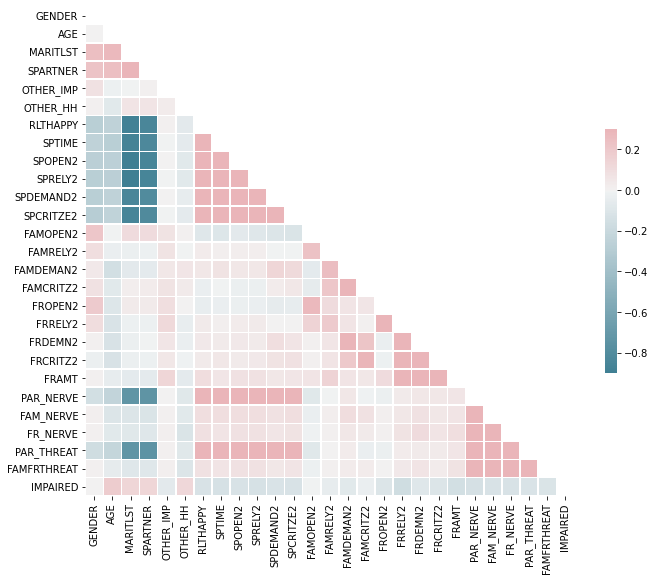

In [10]:
import seaborn as sns
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:

x = data.drop("IMPAIRED", axis=1, inplace=False) #.copy()
y = data["IMPAIRED"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)

In [10]:
import statsmodels.api as sm
#x = sm.add_constant(x)
logit_mod=sm.Logit(y,x)
result=logit_mod.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.639196
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               IMPAIRED   No. Observations:                 3111
Model:                          Logit   Df Residuals:                     3085
Method:                           MLE   Df Model:                           25
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                 0.07734
Time:                        16:26:43   Log-Likelihood:                -1988.5
converged:                       True   LL-Null:                       -2155.2
Covariance Type:            nonrobust   LLR p-value:                 1.143e-55
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
GENDER         -0.0113      0.083     -0.137      0.891      -0.173       0.151
AGE             0.0341    

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.95186436,  0.52266095, -0.68053313, ...,  0.35114412,
         0.70169721,  0.28532136],
       [-1.05056986,  0.25041982, -0.68053313, ...,  0.82522932,
         1.95136101,  1.42416605],
       [-1.05056986,  0.65878151, -0.68053313, ...,  0.82522932,
         0.70169721,  0.28532136],
       ...,
       [-1.05056986,  1.61162544, -0.68053313, ...,  0.35114412,
         0.70169721,  0.28532136],
       [ 0.95186436, -0.56630354, -0.68053313, ...,  0.35114412,
         0.70169721,  0.28532136],
       [ 0.95186436,  1.33938431,  1.56751472, ...,  0.35114412,
        -1.1727985 ,  0.28532136]])

### KNN Model

In [12]:
# CV for KNN, to understnad whether model is overfitted
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5, scoring = "roc_auc")
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.60469897 0.63107562 0.61839207 0.60411406 0.62083203]
cv_scores mean:0.6158225505194797
ROC AUC: 0.62 (+/- 0.01)


In [13]:
# predictions with CV fitted model
knn_cv.fit(x_train, y_train)
y_pred = knn_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#pr_table.set_index('classifiers', inplace=True)

[[284 116]
 [193 185]]
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       400
           1       0.61      0.49      0.54       378

    accuracy                           0.60       778
   macro avg       0.61      0.60      0.60       778
weighted avg       0.60      0.60      0.60       778

0.5997089947089946


In [14]:

#create new a knn model
knn = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
grid_search = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [15]:
grid_search.best_params_

{'n_neighbors': 15}

In [16]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[310  90]
 [215 163]]
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       400
           1       0.64      0.43      0.52       378

    accuracy                           0.61       778
   macro avg       0.62      0.60      0.59       778
weighted avg       0.62      0.61      0.60       778



0.6031084656084656

### SVM Model

In [17]:
svc_cv = SVC(kernel='rbf', gamma= 'auto')
cv_scores = cross_val_score(svc_cv, x_train, y_train, cv=5, scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.67358664 0.68491189 0.66009545 0.65255378 0.67083848]
cv_scores mean:0.6683972468496365
ROC AUC: 0.67 (+/- 0.01)


In [18]:
# predictions with CV fitted model of SVM
svc_cv.fit(x_train, y_train)
y_pred = svc_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#result_table.set_index('classifiers', inplace=True)

[[285 115]
 [166 212]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       400
           1       0.65      0.56      0.60       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778

0.6366732804232804


In [19]:
from sklearn.model_selection import GridSearchCV 
svc = SVC() 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_search = GridSearchCV(svc, param_grid, cv=5) 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [20]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [21]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[289 111]
 [169 209]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       400
           1       0.65      0.55      0.60       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778



0.6377050264550265

### Random Forest Model

In [22]:
rf_cv = RandomForestClassifier(max_depth=20, max_features=20, n_estimators=1000)
cv_scores = cross_val_score(rf_cv, x_train, y_train, cv=5,scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.68948238 0.69430984 0.68802313 0.69467126 0.65905111]
cv_scores mean:0.6851075439760628
ROC AUC: 0.69 (+/- 0.01)


In [23]:
# predictions with CV fitted model of RF

rf_cv.fit(x_train, y_train)
y_pred = rf_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)



[[272 128]
 [155 223]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       400
           1       0.64      0.59      0.61       378

    accuracy                           0.64       778
   macro avg       0.64      0.63      0.63       778
weighted avg       0.64      0.64      0.64       778

0.6349735449735449


In [24]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': [2, 4, 6, 8, 10, 15],
    'n_estimators': [50, 100, 150, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(rf,param_grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, 40, 50],
                         'max_features': [2, 4, 6, 8, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 300]})

In [25]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 4, 'n_estimators': 300}

In [26]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[284 116]
 [164 214]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       400
           1       0.65      0.57      0.60       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778



0.638068783068783

In [27]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score,pos_label=1,greater_is_better=True),
    'accuracy_score': make_scorer(accuracy_score)
}

In [28]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(x_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [29]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')


Best params for recall_score
{'max_depth': 15, 'max_features': 10, 'min_samples_split': 10, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       265       135
pos       147       231


In [30]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
35,0.676,0.553,0.654,5,5,10,300
32,0.674,0.552,0.652,5,5,5,100
40,0.672,0.568,0.655,5,10,10,100
28,0.672,0.540,0.648,5,3,10,100
31,0.672,0.557,0.652,5,5,3,300


In [31]:
#prediction with best param
final_model = grid_search_clf.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[265 135]
 [147 231]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       400
           1       0.63      0.61      0.62       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778



0.6368055555555556

In [32]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = KNeighborsClassifier()
estimators.append(('KNN', model1))
model2 = SVC(kernel='rbf', gamma= 'auto')
estimators.append(('SVC', model2))
model3 = RandomForestClassifier()
estimators.append(('RF', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

0.6343567734125675


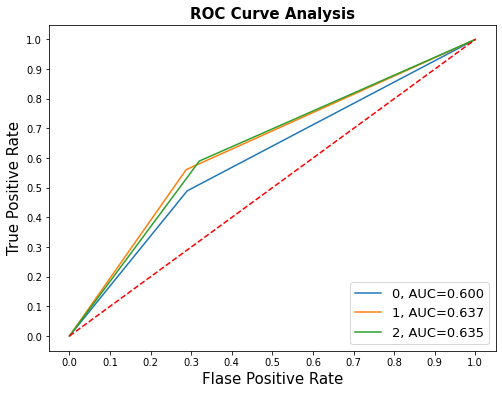

In [33]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

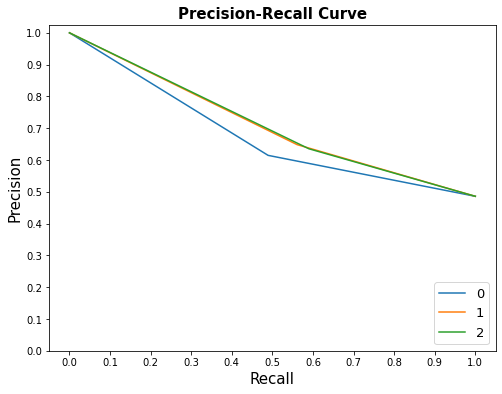

In [34]:
fig = plt.figure(figsize=(8,6))

for i in pr_table.index:
    plt.plot(pr_table.loc[i]['Recall'], 
             pr_table.loc[i]['Precision'],label="{}".format(i))
    
# for i in result_table.index:
#     plt.plot(result_table.loc[i]['fpr'], 
#              result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
    
    #plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Random Forest feature importance
Feature: GENDER, Score: 0.02271
Feature: AGE, Score: 0.14776
Feature: MARITLST, Score: 0.02306
Feature: SPARTNER, Score: 0.00594
Feature: OTHER_IMP, Score: 0.02501
Feature: OTHER_HH, Score: 0.02178
Feature: RLTHAPPY, Score: 0.02834
Feature: SPTIME, Score: 0.03427
Feature: SPOPEN2, Score: 0.01668
Feature: SPRELY2, Score: 0.01243
Feature: SPDEMAND2, Score: 0.03608
Feature: SPCRITZE2, Score: 0.03897
Feature: FAMOPEN2, Score: 0.04346
Feature: FAMRELY2, Score: 0.03191
Feature: FAMDEMAN2, Score: 0.04504
Feature: FAMCRITZ2, Score: 0.04695
Feature: FROPEN2, Score: 0.04965
Feature: FRRELY2, Score: 0.05463
Feature: FRDEMN2, Score: 0.03414
Feature: FRCRITZ2, Score: 0.04205
Feature: FRAMT, Score: 0.06875
Feature: PAR_NERVE, Score: 0.03360
Feature: FAM_NERVE, Score: 0.04788
Feature: FR_NERVE, Score: 0.05352
Feature: PAR_THREAT, Score: 0.01584
Feature: FAMFRTHREAT, Score: 0.01957


<AxesSubplot:>

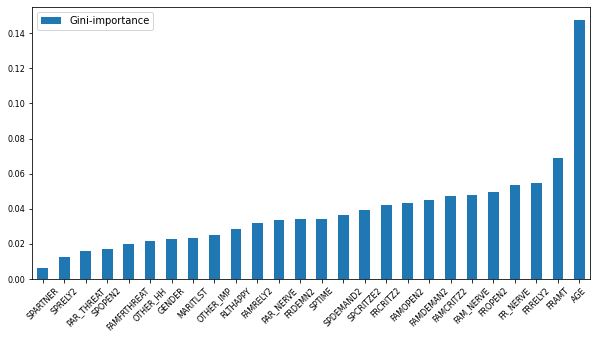

In [35]:
print("Random Forest feature importance")

model = rf_cv
for feature, importance in zip(data.columns, model.feature_importances_):
	print('Feature: %0s, Score: %.5f' % (feature,importance))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', fontsize = 8, rot=45)

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
from  tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from  tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from  tensorflow.keras.layers import LeakyReLU
from  tensorflow.keras.layers import UpSampling2D, Conv2D
from  tensorflow.keras.models import Sequential, Model
from  tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(100, input_shape=x_train.shape[1:]))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(60))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Dense(30))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [38]:
adam_lr = 0.0002
adam_beta_1 = 0.5
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [39]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
#history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid))

Epoch 1/100
73/73 [==============================] - 2s 14ms/step - loss: 2.1850 - accuracy: 0.5347 - val_loss: 0.6802 - val_accuracy: 0.5758
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.5656 - val_loss: 0.6798 - val_accuracy: 0.5746
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.5522 - val_loss: 0.6783 - val_accuracy: 0.5848
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5714 - val_loss: 0.6732 - val_accuracy: 0.6067
Epoch 5/100
73/73 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5859 - val_loss: 0.6755 - val_accuracy: 0.5900
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5464 - val_loss: 0.6698 - val_accuracy: 0.6015
Epoch 7/100
73/73 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5837 - val_loss: 0.6733 - val_accuracy: 0.5925
Epoch 8/100
